# Homework 3: Coding Part
Due: Mar 23, 2023 at 11:00 pm

Submit through Gradescope. Please upload .ipynb

In [1]:
# customary imports:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import os
import tqdm
from sklearn.model_selection import StratifiedKFold

# 1. Download the white blood cell classification data
The data is hosted online, so we can use the linux command `wget` to download it. If you run into any issues with the data download, please just share your challenges via Slack and we can help sort them out.

In [2]:
# if this breaks please contact the TAs
# !wget -O data.zip https://data.mendeley.com/public-files/datasets/snkd93bnjr/files/2fc38728-2ae7-4a62-a857-032af82334c3/file_downloaded
# !unzip data.zip

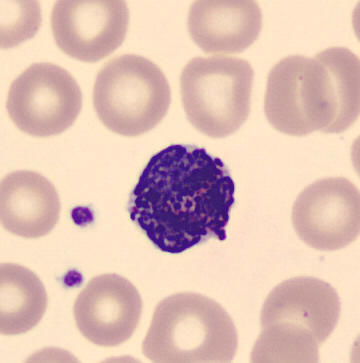

In [3]:
# loading a sample image
sample_image = Image.open("PBC_dataset_normal_DIB/basophil/BA_100102.jpg")
sample_image

(12432, 128, 128, 1) (12432, 8)
(3109, 128, 128, 1) (3109, 8)


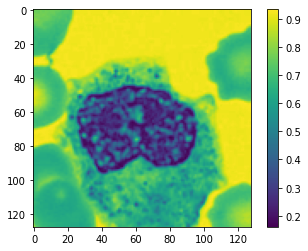

In [4]:
def load_and_crop(image_path, crop_size, normalized=True):
    image = Image.open(image_path).resize([200,200])
    width, height = image.size   # Get dimensions
    left = (width - crop_size)/2
    top = (height - crop_size)/2
    right = (width + crop_size)/2
    bottom = (height + crop_size)/2
    # Crop the center of the image
    image = ImageOps.grayscale(image.crop((left, top, right, bottom)))
    if normalized:
        return np.array(image).astype(np.float32) / 255.0
    else:
        return np.array(image).astype(np.float32)

# code to load all the data, assuming dataset is at PBC_dataset_normal_DIB relative path
cell_types = ['basophil', 'eosinophil', 'erthroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
cell_inds = np.arange(0, len(cell_types))
x_data = []
y_data = []
for cell_ind in cell_inds:
    all_images = glob.glob(os.path.join('PBC_dataset_normal_DIB', cell_types[cell_ind], '*.jpg'))
    x_data += [load_and_crop(image_path, 128) for image_path in all_images]
    y_data += [cell_ind]*len(all_images)

# adding a fake color channel
x_data = np.array(x_data).reshape(-1, 128, 128, 1)
y_data = np.array(y_data)

folder = StratifiedKFold(5, shuffle=True)
x_indices = np.arange(0, len(x_data))
train_indices, val_indices = folder.split(x_indices, y_data).__next__()
# shuffling
np.random.shuffle(train_indices)

x_train = x_data[train_indices]
y_train = np.eye(len(cell_types))[y_data[train_indices]]

x_val = x_data[val_indices]
y_val = np.eye(len(cell_types))[y_data[val_indices]]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

plt.imshow(x_train[0,:,:,0])
plt.colorbar()

# 2. Define a keras model
You can either use the sequential model class, or the functional model declaration

(a) Please define your model with the following layers:
1. A convolutional layer with a 5x5 kernel and stride of 1
2. A convolutional layer with a 5x5 kernel and stride of 1
3. A pooling layer
4. A convolutional layer with a 5x5 kernel and stride of 1
5. A convolutional layer with a 5x5 kernel and stride of 1
6. A pooling layer
7. A Dense layer
8. Output layer of size 8

You are free to choose the sizes, number of channels and activations (i.e., the employed non-linearity) for each of the layers.

(b) Now, please comment out the pooling layer in step 3 and step 6, and instead increase the stride in the appropriate layers to achieve the same down-sampling effect (i.e., to reduce the size of the tensor in the same way as pooling) 

(c) After defining the model, you should define an optimizer and set a learning rate. You also should pick a loss function.

(d) Run the optimization for 10-15 epochs and monitor the training and validation loss and accuracy. After training is done, please plot two graphs, one showing the training and validation losses as two curves within the same plot, and a second graph that shows the the training and validation accuracies as two curves within the same plot. For both plots, please let epoch be the horizontal axis.

At the end of training, you should be able obtain a validation accuracy better than 75%. Even though you are not getting that it should be fine.

You can refer to the notebook from the TA session or any online TensorFlow resources for guidance.

## (a) Please define your model with the following layers - 5 points
1. A convolutional layer with a 5x5 kernel and stride of 1
2. A convolutional layer with a 5x5 kernel and stride of 1
3. A pooling layer
4. A convolutional layer with a 5x5 kernel and stride of 1
5. A convolutional layer with a 5x5 kernel and stride of 1
6. A pooling layer
7. A Dense layer
8. Output layer of size 8

You are free to choose the sizes, number of channels and activations (i.e., the employed non-linearity) for each of the layers.

In [5]:
image_size = (128, 128, 1)
cnn_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input(image_size),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),

    # max pooling layer:
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),

    # max pooling layer:
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='softmax')
])

## (b) Now, please comment out the pooling layer in step 3 and step 6, and instead increase the stride in the appropriate layers to achieve the same down-sampling effect (i.e., to reduce the size of the tensor in the same way as pooling) - 5 points

In [6]:
cnn_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input(image_size),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),

    # max pooling layer:
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),

    # max pooling layer:
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='softmax')
])

## (c) After defining the model, you should define an optimizer and set a learning rate. You also should pick a loss function. - 5 points

In [7]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

## (d) Run the optimization for 10-15 epochs and monitor the training and validation loss and accuracy. - 5 points

At the end of training, you should be able obtain an accuracy better than 75%.  Even though you are not getting that it should be fine.

In [8]:
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

Epoch 1/10
389/389 [==============================] - 9s 13ms/step - loss: 1.3885 - accuracy: 0.4670 - val_loss: 0.9158 - val_accuracy: 0.6648
Epoch 2/10
389/389 [==============================] - 5s 12ms/step - loss: 0.8801 - accuracy: 0.6726 - val_loss: 0.8370 - val_accuracy: 0.7009
Epoch 3/10
389/389 [==============================] - 5s 12ms/step - loss: 0.8041 - accuracy: 0.7066 - val_loss: 0.8165 - val_accuracy: 0.6993
Epoch 4/10
389/389 [==============================] - 5s 13ms/step - loss: 0.7646 - accuracy: 0.7238 - val_loss: 0.7531 - val_accuracy: 0.7305
Epoch 5/10
389/389 [==============================] - 5s 12ms/step - loss: 0.7060 - accuracy: 0.7455 - val_loss: 0.6950 - val_accuracy: 0.7562
Epoch 6/10
389/389 [==============================] - 5s 12ms/step - loss: 0.6581 - accuracy: 0.7657 - val_loss: 0.6863 - val_accuracy: 0.7401
Epoch 7/10
389/389 [==============================] - 5s 12ms/step - loss: 0.6001 - accuracy: 0.7893 - val_loss: 0.5783 - val_accuracy: 0.7996

## (e) After training is done, please plot two graphs, one showing the training and validation losses as two curves within the same plot, and a second graph that shows the the training and validation accuracies as two curves within the same plot. For both plots, please let epoch be the horizontal axis. - 5 points

In [9]:
def plot_train_val_loss(hist):
    plt.title("Learning Curve")
    plt.plot(np.arange(10),hist.history.get('loss'), label="Train")
    plt.plot(np.arange(10),hist.history.get('val_loss'), label="Test")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [10]:
def plot_train_val_acc(hist):
    plt.title("Learning Curve")
    plt.plot(np.arange(10),hist.history.get('accuracy'), label="Train")
    plt.plot(np.arange(10),hist.history.get('val_accuracy'), label="Test")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

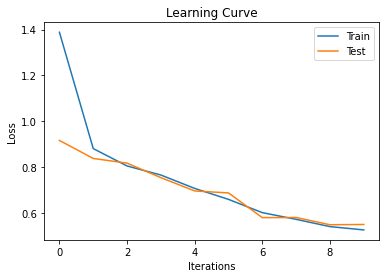

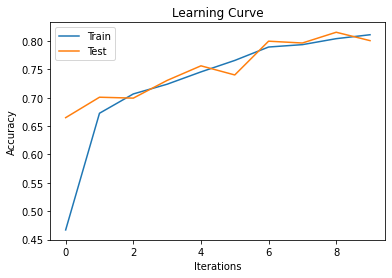

In [11]:
# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

# 3. How many weight parameters does your network have? - 5 points
First try calculating this number by hand, and show your work (please type out the multiplications that you are performing to arrive at the final number.) Then, please verify the answer using Keras's autogenerated model summary.

|     Layer     |  Output Shape  | # Param Calc. | # Parameters |
|---|---|---|---|
|Image Input|128 X 128 X 1 | NA | NA |
|Conv2D Layer 1| 124 X 124 X 6 |((5 * 5 * 1) + 1) * 6| 156|
|Conv2D Layer 2| 120 X 120 X 6 |((5 * 5 * 6) + 1) * 6 |906|
|Conv2D Layer 3| 58 X 58 X 6 |((5 * 5 * 6) + 1) * 6 |906|
|Conv2D Layer 4| 27 X 27 X 6 |((5 * 5 * 6) + 1) * 6 |906|
|Flatten| 27 X 27 X 6 = 4374 | NA | NA |
|Dense Layer 1| 8 | (4374 + 1) * 8 | 35000 |

#### Total Parameters = 156 + 906 + 906 + 906 + 35000 = 37874

In [12]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 6)       156       
                                                                 
 conv2d_5 (Conv2D)           (None, 120, 120, 6)       906       
                                                                 
 conv2d_6 (Conv2D)           (None, 58, 58, 6)         906       
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 27, 6)         906       
                                                                 
 flatten_1 (Flatten)         (None, 4374)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 35000     
                                                                 
Total params: 37,874
Trainable params: 37,874
Non-trai

# 4. Visualize filters
You can obtain weights in individual layers by running 
```
your_model_variable.layers[layer_index].get_weights()
```


## (a) Plot all convolution kernels (i.e., each set of 5x5 weights) in your first convolutional layer. - 5 points

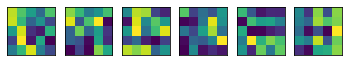

In [13]:
# retrieve weights from the first layer
filter_weights, bias_weights = cnn_model.layers[0].get_weights()

# normalize filter values to visualize them
filter_weights_norm = (filter_weights-np.min(filter_weights))/(np.max(filter_weights)-np.min(filter_weights))

# plot the filter
ix = 1
for i in range(6): 
    f = filter_weights_norm[:, :, :, i]
    ax = plt.subplot(1, 6, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f)
    ix += 1
plt.show()

## (b) Also plot some of the convolutional weights in the second layer. - 5 points

Filter Channel: 1


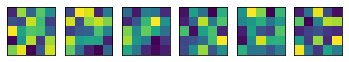

Filter Channel: 2


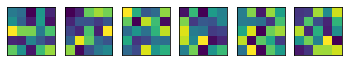

Filter Channel: 3


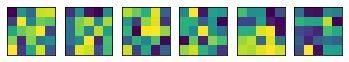

Filter Channel: 4


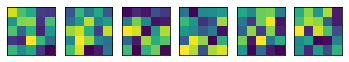

Filter Channel: 5


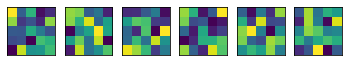

Filter Channel: 6


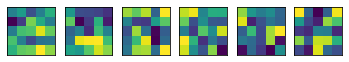

In [14]:
# retrieve weights from the second layer
filter_weights, bias_weights = cnn_model.layers[1].get_weights()

# normalize filter values to visualize them
filter_weights_norm = (filter_weights-np.min(filter_weights))/(np.max(filter_weights)-np.min(filter_weights))

# plot the filters
for i in range(6):
    f = filter_weights_norm[:, :, :, i]
    ix = 1
    print(f"Filter Channel: {i+1}")
    for j in range(6):
        ax = plt.subplot(1, 6, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j])
        ix += 1
    plt.show()

# 5. Try playing with the learning rate

## (a) Try to increase and decrease the learning rate and plot the training and validation loss and accuracy curves. Please use three different learning rates. - 5 points

Epoch 1/10
389/389 [==============================] - 10s 15ms/step - loss: 0.5884 - accuracy: 0.7836 - val_loss: 0.5383 - val_accuracy: 0.8064
Epoch 2/10
389/389 [==============================] - 5s 13ms/step - loss: 0.5323 - accuracy: 0.8069 - val_loss: 0.5188 - val_accuracy: 0.8173
Epoch 3/10
389/389 [==============================] - 4s 11ms/step - loss: 0.4966 - accuracy: 0.8160 - val_loss: 0.5469 - val_accuracy: 0.8041
Epoch 4/10
389/389 [==============================] - 5s 12ms/step - loss: 0.4681 - accuracy: 0.8305 - val_loss: 0.4945 - val_accuracy: 0.8318
Epoch 5/10
389/389 [==============================] - 5s 12ms/step - loss: 0.4517 - accuracy: 0.8370 - val_loss: 0.5145 - val_accuracy: 0.8170
Epoch 6/10
389/389 [==============================] - 4s 11ms/step - loss: 0.4238 - accuracy: 0.8493 - val_loss: 0.6312 - val_accuracy: 0.7636
Epoch 7/10
389/389 [==============================] - 5s 12ms/step - loss: 0.3950 - accuracy: 0.8580 - val_loss: 0.4443 - val_accuracy: 0.839

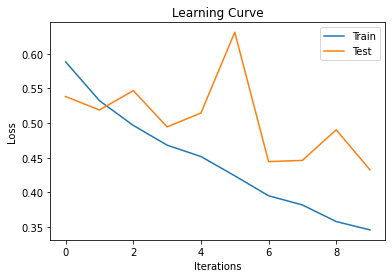

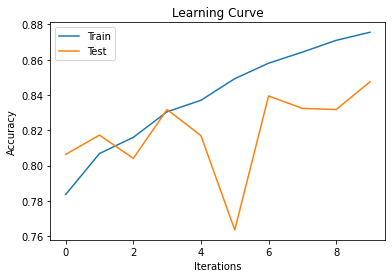

In [15]:
# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

Epoch 1/10
389/389 [==============================] - 7s 14ms/step - loss: 0.3884 - accuracy: 0.8571 - val_loss: 0.4146 - val_accuracy: 0.8604
Epoch 2/10
389/389 [==============================] - 4s 11ms/step - loss: 0.3455 - accuracy: 0.8748 - val_loss: 0.4498 - val_accuracy: 0.8369
Epoch 3/10
389/389 [==============================] - 5s 12ms/step - loss: 0.3104 - accuracy: 0.8884 - val_loss: 0.5114 - val_accuracy: 0.8250
Epoch 4/10
389/389 [==============================] - 4s 11ms/step - loss: 0.2933 - accuracy: 0.8934 - val_loss: 0.4348 - val_accuracy: 0.8511
Epoch 5/10
389/389 [==============================] - 4s 11ms/step - loss: 0.2524 - accuracy: 0.9060 - val_loss: 0.5164 - val_accuracy: 0.8212
Epoch 6/10
389/389 [==============================] - 5s 12ms/step - loss: 0.2282 - accuracy: 0.9156 - val_loss: 0.4946 - val_accuracy: 0.8437
Epoch 7/10
389/389 [==============================] - 5s 12ms/step - loss: 0.2094 - accuracy: 0.9224 - val_loss: 0.5049 - val_accuracy: 0.8495

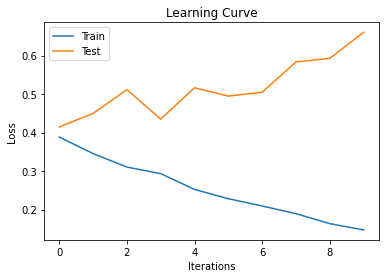

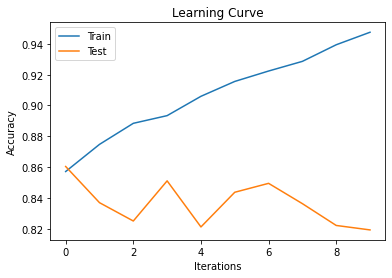

In [16]:
# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

Epoch 1/10
389/389 [==============================] - 7s 13ms/step - loss: 0.1921 - accuracy: 0.9291 - val_loss: 0.6882 - val_accuracy: 0.7845
Epoch 2/10
389/389 [==============================] - 4s 11ms/step - loss: 0.1645 - accuracy: 0.9386 - val_loss: 0.6211 - val_accuracy: 0.8324
Epoch 3/10
389/389 [==============================] - 5s 12ms/step - loss: 0.1411 - accuracy: 0.9481 - val_loss: 0.6406 - val_accuracy: 0.8250
Epoch 4/10
389/389 [==============================] - 4s 11ms/step - loss: 0.1387 - accuracy: 0.9497 - val_loss: 0.7510 - val_accuracy: 0.8237
Epoch 5/10
389/389 [==============================] - 4s 11ms/step - loss: 0.1162 - accuracy: 0.9569 - val_loss: 0.7607 - val_accuracy: 0.8318
Epoch 6/10
389/389 [==============================] - 5s 12ms/step - loss: 0.1015 - accuracy: 0.9644 - val_loss: 0.7571 - val_accuracy: 0.8244
Epoch 7/10
389/389 [==============================] - 4s 11ms/step - loss: 0.1029 - accuracy: 0.9628 - val_loss: 0.8776 - val_accuracy: 0.8167

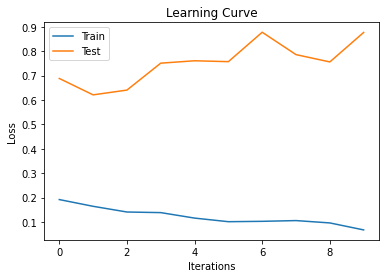

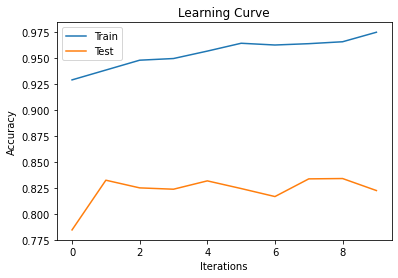

In [17]:
# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

## (b) Please comment on any trends that you can identify between how the plots change as a function of learning rate. Specifically, what happens to the slopes of the training loss and accuracy as a function of learning rate? - 5 points

As we increase the learning rate, we observe that the train loss decreases and train accuracy increases at a much faster rate. But, we do not see a similar decrease and increase in the validation curves which shows that the model is overfitting and is not able to generalize well on unseen data.

For the slopes, we see that as the learning rate is increased, the slopes for both train accuracy and loss become less steep which makes sense as the model is able to improve it's performance quickly when given a higher learning rate.

# 6. Adding Batch Norm - 5 points
Fix a value of the learning rate and try adding Batch Normalization after the second and fourth conv layers. Please plot the training and validation loss and accuracy curves. Does it improve the performance of your model? Explain briefly.

In [18]:
cnn_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input(image_size),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),

    # batch norm layer:
    tf.keras.layers.BatchNormalization(),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),

    # batch norm layer:
    tf.keras.layers.BatchNormalization(),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='softmax')
])

Epoch 1/10
389/389 [==============================] - 9s 15ms/step - loss: 0.8975 - accuracy: 0.6681 - val_loss: 1.3336 - val_accuracy: 0.4960
Epoch 2/10
389/389 [==============================] - 5s 13ms/step - loss: 0.6738 - accuracy: 0.7533 - val_loss: 1.5903 - val_accuracy: 0.5146
Epoch 3/10
389/389 [==============================] - 5s 13ms/step - loss: 0.5419 - accuracy: 0.8030 - val_loss: 1.4448 - val_accuracy: 0.5995
Epoch 4/10
389/389 [==============================] - 5s 13ms/step - loss: 0.4021 - accuracy: 0.8574 - val_loss: 0.9232 - val_accuracy: 0.7150
Epoch 5/10
389/389 [==============================] - 5s 13ms/step - loss: 0.3492 - accuracy: 0.8740 - val_loss: 0.7127 - val_accuracy: 0.7588
Epoch 6/10
389/389 [==============================] - 5s 12ms/step - loss: 0.3122 - accuracy: 0.8879 - val_loss: 0.5833 - val_accuracy: 0.7813
Epoch 7/10
389/389 [==============================] - 5s 13ms/step - loss: 0.2691 - accuracy: 0.9036 - val_loss: 0.5162 - val_accuracy: 0.8286

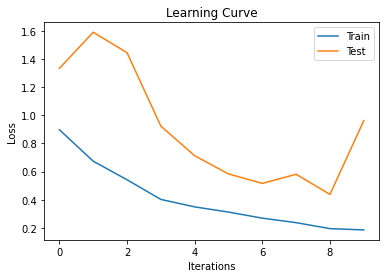

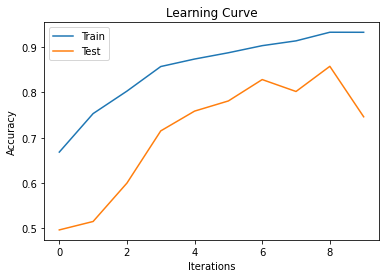

In [19]:
# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

Adding batch normalization layers didn't affect the final performance of the model on the test data too much but we do see that the model was able to train more smoothly without any spikes in the loss or accuracy curves.

# 7. Data Augmetation - 5 points
Now, instead of giving the dataset directly to the network, augment it first using:
```
keras.preprocessing.image.ImageDataGenerator
```
Specifically, use vertical and horizontal flips and 20 degrees rotation. Feel free to consult the documentation for this function.

Please plot the training and validation loss and accuracy curves. What effect does this have on your model?

[Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [20]:
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20)

Epoch 1/10
389/389 [==============================] - 27s 62ms/step - loss: 0.7962 - accuracy: 0.7083 - val_loss: 1.8807 - val_accuracy: 0.4288
Epoch 2/10
389/389 [==============================] - 22s 57ms/step - loss: 0.5384 - accuracy: 0.8123 - val_loss: 1.0645 - val_accuracy: 0.6668
Epoch 3/10
389/389 [==============================] - 23s 60ms/step - loss: 0.4773 - accuracy: 0.8340 - val_loss: 0.8949 - val_accuracy: 0.7224
Epoch 4/10
389/389 [==============================] - 23s 60ms/step - loss: 0.4231 - accuracy: 0.8481 - val_loss: 0.5197 - val_accuracy: 0.8163
Epoch 5/10
389/389 [==============================] - 23s 60ms/step - loss: 0.3872 - accuracy: 0.8602 - val_loss: 0.9061 - val_accuracy: 0.7173
Epoch 6/10
389/389 [==============================] - 23s 60ms/step - loss: 0.3721 - accuracy: 0.8686 - val_loss: 0.4002 - val_accuracy: 0.8668
Epoch 7/10
389/389 [==============================] - 23s 60ms/step - loss: 0.3586 - accuracy: 0.8719 - val_loss: 0.6807 - val_accuracy:

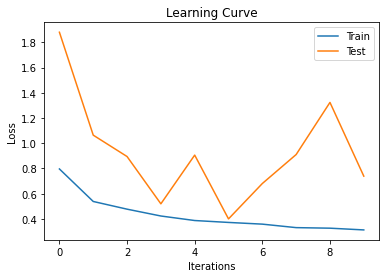

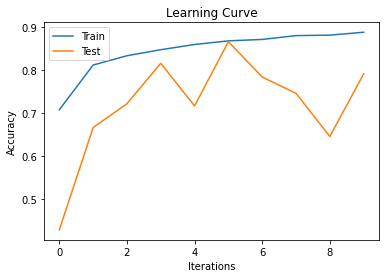

In [21]:
# model
cnn_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input(image_size),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),

    # batch norm layer:
    tf.keras.layers.BatchNormalization(),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),

    # batch norm layer:
    tf.keras.layers.BatchNormalization(),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='softmax')
])

# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(data_aug.flow(x_train, y_train, batch_size=32),
              epochs=10,
              validation_data=data_aug.flow(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

# 8. Custom layer for Fourier filtering

Note: this problem requires some careful bug-checking

Now, we will implement a custom layer that doesn't exist in keras -- Fourier filtering. Your layer should apply the 2D Fourier transform (`tf.signal.fft2d`) to each channel of the input, multiply element-wise by an optimizable mask (the same one for each channel), apply the 2D inverse Fourier transform (`tf.signal.ifft2d`), and then take the absolute value. Note: 
- You will have to use the tf versions of all operations, NOT the numpy versions. 
- The fft2d operations in tensorflow are done on the LAST two dimensions, which is at odds with the default dimension ordering of CNNs. Thus, you will need to use `tf.transpose` on the input and then transpose back after the filtering operation.
- Use dtype `tf.complex64`, which is basically a combination of two `tf.float32`s. You will have to explicitly cast between these two data types, because the input/output will be `tf.float32`, but intermediate steps will be `tf.complex64`.

Initialize your optimizable Fourier masks using a binary circular mask (1's inside the circle, 0's outside), with a radius given by 1/4 of the square image dimension (you can round if not divisible by 4). 

After defining this custom layer, copy your previously defined CNN above and insert this new layer as the first layer. To verify that your layer is working correctly, plot some example outputs of the first layer.

In [22]:
# There is no 2D fftshift in tf. Please use this instead.
def tf_fftshift2(A):
    # 2D fftshift
    # apply fftshift to the last two dims
    s = tf.shape(A)
    s1 = s[-2]
    s2 = s[-1]
    A = tf.concat([A[..., s1//2:, :], A[..., :s1//2, :]], axis=-2)
    A = tf.concat([A[..., :, s2//2:], A[..., :, :s2//2]], axis=-1)
    return A

## (a) Create circular mask - 5 points

In [23]:
def create_circular_mask(h, w, radius):

    # calculate center
    center = (int(w/2), int(h/2))

    # create a grid of the given height and width
    Y, X = tf.meshgrid(tf.range(h), tf.range(w))
    X = tf.cast(X, tf.float32)
    Y = tf.cast(Y, tf.float32)

    # calculate distance of every element from the center
    dist_from_center = tf.sqrt(tf.math.squared_difference(X, center[0]) + tf.math.squared_difference(Y, center[1]))

    # compute the mask
    mask = tf.math.less_equal(dist_from_center, radius)
    mask = tf.cast(mask, tf.float32)
    
    return mask

## (b) Create FourierFilter class - 25 points

In [24]:
class FourierFilter(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape):
        temp = create_circular_mask(input_shape[1], input_shape[2], round(input_shape[1]/4))
        temp = tf.cast(temp, tf.complex64)
        temp = tf.expand_dims(temp, axis=-1)
        temp = tf.repeat(temp, repeats=input_shape[3], axis=2)
        self.mask = tf.Variable(temp, trainable=True)

    def get_mask(self):
        return self.mask

    def call(self, input):
        input_transpose = tf.transpose(input, perm=[0, 3, 1, 2])
        input_transpose_fft = tf.signal.fft2d(tf.cast(input_transpose, tf.complex64))
        input_transpose_fft_center = tf_fftshift2(input_transpose_fft)
        input_fft_center = tf.transpose(input_transpose_fft_center, perm=[0, 2, 3, 1])
        
        input_fft_center_masked = input_fft_center * self.get_mask()

        input_fft_center_masked_transpose = tf.transpose(input_fft_center_masked, perm=[0, 3, 1, 2])
        input_fft_masked_transpose = tf_fftshift2(input_fft_center_masked_transpose)
        input_masked_transpose = tf.signal.ifft2d(input_fft_masked_transpose)
        input_masked = tf.transpose(input_masked_transpose, perm=[0, 2, 3, 1])

        input_masked = tf.math.abs(input_masked)
        return input_masked

## (c) Training. - 5 points

Epoch 1/10
389/389 [==============================] - 15s 24ms/step - loss: 0.9207 - accuracy: 0.6621 - val_loss: 2.9377 - val_accuracy: 0.1624
Epoch 2/10
389/389 [==============================] - 8s 20ms/step - loss: 0.5930 - accuracy: 0.7846 - val_loss: 0.7933 - val_accuracy: 0.7105
Epoch 3/10
389/389 [==============================] - 9s 22ms/step - loss: 0.4479 - accuracy: 0.8407 - val_loss: 0.6739 - val_accuracy: 0.7716
Epoch 4/10
389/389 [==============================] - 10s 25ms/step - loss: 0.3637 - accuracy: 0.8715 - val_loss: 1.0568 - val_accuracy: 0.6578
Epoch 5/10
389/389 [==============================] - 12s 30ms/step - loss: 0.2835 - accuracy: 0.9004 - val_loss: 0.7564 - val_accuracy: 0.7745
Epoch 6/10
389/389 [==============================] - 14s 35ms/step - loss: 0.2233 - accuracy: 0.9245 - val_loss: 0.6453 - val_accuracy: 0.7958
Epoch 7/10
389/389 [==============================] - 25s 64ms/step - loss: 0.1730 - accuracy: 0.9409 - val_loss: 0.7648 - val_accuracy: 0

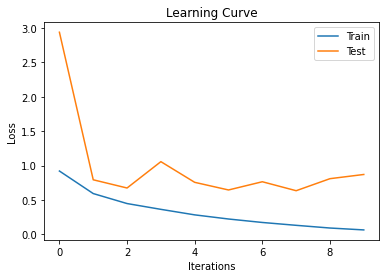

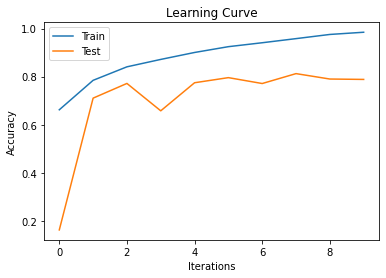

In [25]:
# model
cnn_model = tf.keras.models.Sequential([
    # fourier filter layer
    FourierFilter(),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),

    # batch norm layer:
    tf.keras.layers.BatchNormalization(),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),

    # batch norm layer:
    tf.keras.layers.BatchNormalization(),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='softmax')
])

# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

## (d) Please compare the masks before and after training. - 5 points

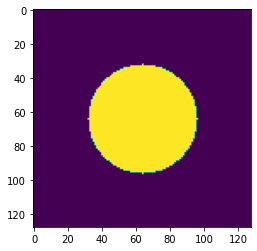

In [26]:
# create original mask which is initialized befor training
mask_original = create_circular_mask(128, 128, 32)
mask_original = tf.cast(mask_original, tf.complex64)
mask_original = tf.expand_dims(mask_original, axis=-1)

# normalize mask values to visualize
mask_original_norm = (mask_original-np.min(mask_original))/(np.max(mask_original)-np.min(mask_original))
mask_original_norm_abs = tf.math.abs(mask_original_norm)

# plot the mask
plt.imshow(mask_original_norm_abs);

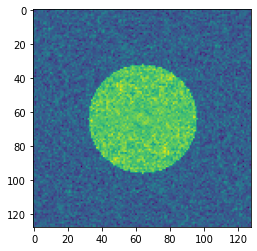

In [27]:
# retrieve trained mask from the model
mask_trained = cnn_model.layers[0].get_weights()[0]

# normalize mask values to visualize
mask_trained_norm = (mask_trained-np.min(mask_trained))/(np.max(mask_trained)-np.min(mask_trained))
mask_trained_norm_abs = tf.math.abs(mask_trained_norm)

# plot the mask
plt.imshow(mask_trained_norm_abs);